import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
# 2. Upload file manual
from google.colab import files
uploaded = files.upload()

Saving Mahasiswa-Angkatan_III-2024-Universitas_Muhammadiyah_Sumatera_Utara-250620251201.xlsx to Mahasiswa-Angkatan_III-2024-Universitas_Muhammadiyah_Sumatera_Utara-250620251201 (1).xlsx


In [14]:
# 3. Membaca data dari file Excel
filename = next(iter(uploaded))  # Mengambil nama file pertama
df = pd.read_excel(filename)

In [15]:
# 4. Ambil 500 data pertama
df = df.head(500)

In [20]:
# 4. Ambil kolom yang dibutuhkan
data = df[['PENGHASILAN AYAH', 'PENGHASILAN IBU']].dropna()

In [21]:
# 5. BINNING PENGHASILAN AYAH
# -------------------------
bins = [0, 1000000, 3000000, 6000000, 10000000]
labels = ['Rendah', 'Menengah', 'Tinggi', 'Sangat Tinggi']
data['Kategori_Penghasilan_Ayah'] = pd.cut(data['PENGHASILAN AYAH'], bins=bins, labels=labels)


/tmp/ipython-input-22-1362625507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori_Penghasilan_Ayah', data=data, palette='pastel')


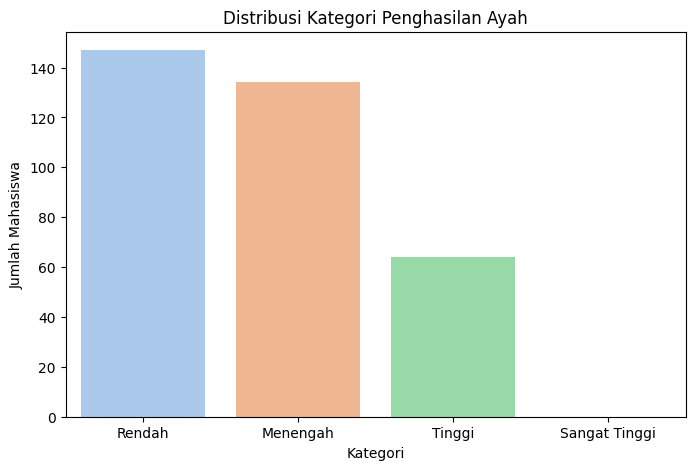

In [22]:
# Visualisasi binning
plt.figure(figsize=(8,5))
sns.countplot(x='Kategori_Penghasilan_Ayah', data=data, palette='pastel')
plt.title('Distribusi Kategori Penghasilan Ayah')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

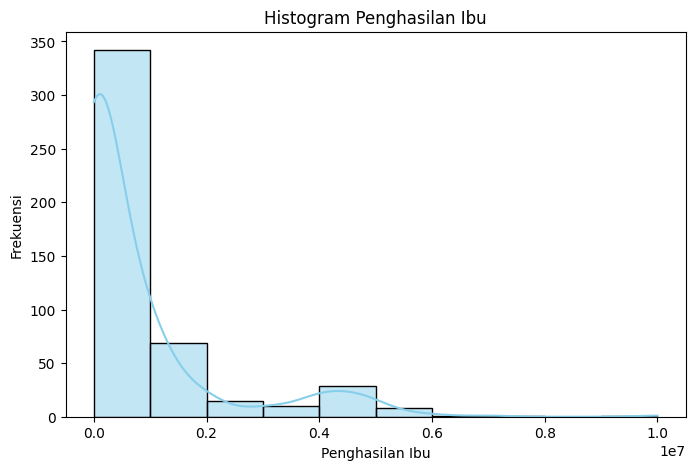

In [23]:
# 6. HISTOGRAM PENGHASILAN IBU
# -------------------------
plt.figure(figsize=(8,5))
sns.histplot(data['PENGHASILAN IBU'], bins=10, kde=True, color='skyblue')
plt.title('Histogram Penghasilan Ibu')
plt.xlabel('Penghasilan Ibu')
plt.ylabel('Frekuensi')
plt.show()


In [24]:
# 7. CLUSTERING K-MEANS
# -------------------------
# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['PENGHASILAN AYAH', 'PENGHASILAN IBU']])

In [25]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

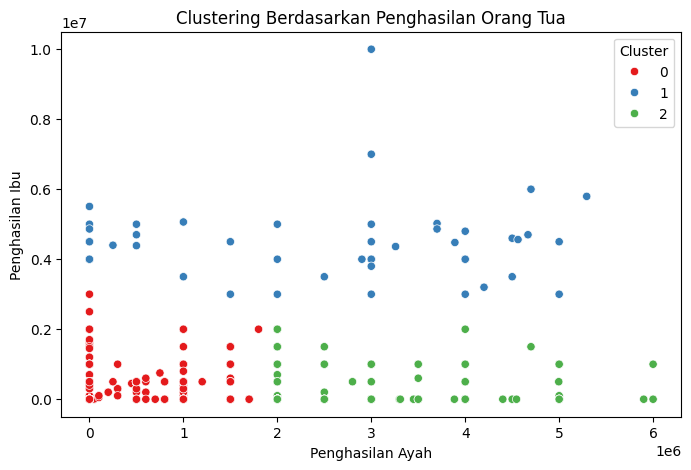

In [26]:
# Visualisasi Clustering
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='PENGHASILAN AYAH',
    y='PENGHASILAN IBU',
    hue='Cluster',
    palette='Set1',
    data=data
)
plt.title('Clustering Berdasarkan Penghasilan Orang Tua')
plt.xlabel('Penghasilan Ayah')
plt.ylabel('Penghasilan Ibu')
plt.legend(title='Cluster')
plt.show()